In [66]:
import numpy as np
import pandas as pd
import collections
import cv2
import random
import os

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [67]:
train_data = np.load(r"data/training_data.npy", allow_pickle=True)
train_data.shape

(13500, 2)

In [68]:
train_data[0][0].shape

(60, 80)

In [69]:
train_data[0][0].reshape(4800)

array([255, 255, 255, ..., 245, 245, 252], dtype=uint8)

In [70]:
train_data[:, 0].shape

(13500,)

In [72]:
# pixel_data = train_data[:, 0].reshape(-1, 1)
pixel_data = train_data[:, 0]

In [73]:
pixel_data.shape

(13500,)

- First convert to list using np.ndarray.tolist()
- np.stack(on converted list)
- reshape the stack to be (n_samples, 4800)

In [77]:
pixel_data = pixel_data.tolist()

In [82]:
len(pixel_data)

13500

In [83]:
pixel_data = np.stack(pixel_data)

In [84]:
pixel_data.shape

(13500, 4800)

In [86]:
pixel_data

array([[255, 255, 255, ..., 245, 245, 252],
       [255, 255, 255, ..., 245, 245, 252],
       [255, 255, 255, ..., 245, 245, 252],
       ...,
       [255, 255, 255, ..., 106,  86,  86],
       [255, 255, 255, ..., 106,  86,  86],
       [255, 255, 255, ..., 106,  86,  86]])

In [10]:
# %%time
# # Use crappy loop to reshape pixels into (91500, 4800)
# reshaped_pixel_data = np.zeros(shape=(91500,4800))
# for i in range(pixel_data.shape[0]):
#     reshaped_pixel_data[i] = np.reshape(pixel_data[i][0], (60*80))
# #     if i % 10000 == 0:
# #         print(np.reshape(pixel_data[i][0], (60*80)))

In [11]:
# reshaped_pixel_data

In [87]:
X = pixel_data

In [88]:
X.shape

(13500, 4800)

In [92]:
%%time
kmeans = MiniBatchKMeans(init='k-means++', 
                         n_clusters=20, 
                         random_state=42, 
                         batch_size=2000,
                         verbose=1,
                        ).fit(X)

Init 1/3 with method: k-means++
Inertia for init 1/3: 18354497528.377892
Init 2/3 with method: k-means++
Inertia for init 2/3: 18740134169.470619
Init 3/3 with method: k-means++
Inertia for init 3/3: 18280283481.251011
Minibatch iteration 1/700: mean batch inertia: 3012282.449546, ewa inertia: 3012282.449546 
Minibatch iteration 2/700: mean batch inertia: 2969646.563706, ewa inertia: 2999650.530180 
Minibatch iteration 3/700: mean batch inertia: 3031026.894808, ewa inertia: 3008946.542217 
Minibatch iteration 4/700: mean batch inertia: 2999505.656635, ewa inertia: 3006149.449977 
Minibatch iteration 5/700: mean batch inertia: 2959358.500244, ewa inertia: 2992286.491757 
Minibatch iteration 6/700: mean batch inertia: 2908119.918303, ewa inertia: 2967350.094911 
Minibatch iteration 7/700: mean batch inertia: 2975030.276337, ewa inertia: 2969625.535671 
Minibatch iteration 8/700: mean batch inertia: 2941733.893765, ewa inertia: 2961361.957594 
Minibatch iteration 9/700: mean batch inertia

In [93]:
%%time
predictions = kmeans.predict(X)

Computing label assignment and total inertia
Wall time: 473 ms


In [103]:
cluster_counts = collections.Counter(predictions)
cluster_counts

Counter({4: 936,
         9: 1051,
         7: 1817,
         1: 1607,
         14: 231,
         8: 716,
         2: 1403,
         0: 872,
         16: 347,
         19: 628,
         6: 550,
         11: 828,
         13: 236,
         17: 449,
         3: 810,
         5: 158,
         15: 340,
         10: 184,
         12: 221,
         18: 116})

In [115]:
counter_counts_df = pd.DataFrame.from_dict(cluster_counts, orient='index').sort_values(by=0, ascending=False)

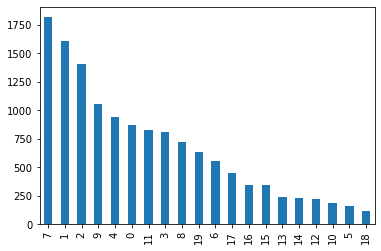

In [129]:
counter_counts_df.plot.bar(legend=False)

([<matplotlib.axis.XTick at 0x155000d9648>,
 [Text(0, 0, '4'),
  Text(0, 0, '9'),
  Text(0, 0, '7'),
  Text(0, 0, '1'),
  Text(0, 0, '14'),
  Text(0, 0, '8'),
  Text(0, 0, '2'),
  Text(0, 0, '0'),
  Text(0, 0, '16'),
  Text(0, 0, '19'),
  Text(0, 0, '6'),
  Text(0, 0, '11'),
  Text(0, 0, '13'),
  Text(0, 0, '17'),
  Text(0, 0, '3'),
  Text(0, 0, '5'),
  Text(0, 0, '15'),
  Text(0, 0, '10'),
  Text(0, 0, '12'),
  Text(0, 0, '18')])

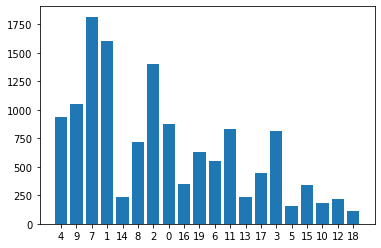

In [106]:
plt.bar(range(len(cluster_counts)), list(cluster_counts.values()), align='center')
plt.xticks(range(len(cluster_counts)), list(cluster_counts.keys()))

In [63]:
predictions_df = pd.Series(predictions)

In [65]:
for prediction in predictions_df.unique():
    print(f"Prediction class: {prediction}")
    samples = random.sample(predictions_df.loc[predictions_df == prediction].index.tolist(), k=100)
    
    # Create dir if doesn't exist
    img_file_dir = "data\\imgs\\" + str(prediction) + "\\"
    if not os.path.exists(img_file_dir):
        os.makedirs(img_file_dir)
        
    print(img_file_dir)
    
    for sample in samples:
#         img = cv2.imdecode(pixel_data[prediction], iscolor="CV_LOAD_IMAGE_COLOR")
        img = train_data[sample][0]
        img = cv2.resize(img, (800, 600))
        file_name = str(sample) + '.jpg'
        cv2.imwrite(img_file_dir + file_name, img) 
#     predictions_df.loc[predictions_df == 0].index
#     print(sample)
#     print()
    print(f"Class {prediction} done!")
    
print("Done!")

Prediction class: 16
data\imgs\16\
Class 16 done!
Prediction class: 10
data\imgs\10\
Class 10 done!
Prediction class: 0
data\imgs\0\
Class 0 done!
Prediction class: 1
data\imgs\1\
Class 1 done!
Prediction class: 6
data\imgs\6\
Class 6 done!
Prediction class: 12
data\imgs\12\
Class 12 done!
Prediction class: 3
data\imgs\3\
Class 3 done!
Prediction class: 15
data\imgs\15\
Class 15 done!
Prediction class: 5
data\imgs\5\
Class 5 done!
Prediction class: 13
data\imgs\13\
Class 13 done!
Prediction class: 17
data\imgs\17\
Class 17 done!
Prediction class: 4
data\imgs\4\
Class 4 done!
Prediction class: 9
data\imgs\9\
Class 9 done!
Prediction class: 2
data\imgs\2\
Class 2 done!
Prediction class: 19
data\imgs\19\
Class 19 done!
Prediction class: 18
data\imgs\18\
Class 18 done!
Prediction class: 11
data\imgs\11\
Class 11 done!
Prediction class: 7
data\imgs\7\
Class 7 done!
Prediction class: 14
data\imgs\14\
Class 14 done!
Prediction class: 8
data\imgs\8\
Class 8 done!
Done!


# Determining good value for k

In [42]:
# import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [47]:
%%time
km_silhouette = []
k_values = range(3,30)
for k in k_values:
    kmeans = MiniBatchKMeans(init='k-means++', 
                             n_clusters=k, 
                             random_state=42, 
                             batch_size=1000,
                             verbose=1,
                            ).fit(X)
    predictions = kmeans.predict(X)
    silhouette = silhouette_score(X, predictions)
    km_silhouette.append(silhouette)

Init 1/3 with method: k-means++
Inertia for init 1/3: 18314939165.719246
Init 2/3 with method: k-means++
Inertia for init 2/3: 18521609064.126751
Init 3/3 with method: k-means++
Inertia for init 3/3: 18683940209.189621
Minibatch iteration 1/1400: mean batch inertia: 6003120.986292, ewa inertia: 6003120.986292 
Minibatch iteration 2/1400: mean batch inertia: 6012702.554648, ewa inertia: 6004540.372761 
Minibatch iteration 3/1400: mean batch inertia: 5777516.111613, ewa inertia: 5970909.640052 
Minibatch iteration 4/1400: mean batch inertia: 5843752.825745, ewa inertia: 5952072.988796 
Minibatch iteration 5/1400: mean batch inertia: 6045919.403128, ewa inertia: 5965975.131501 
Minibatch iteration 6/1400: mean batch inertia: 6100702.785448, ewa inertia: 5985933.305554 
Minibatch iteration 7/1400: mean batch inertia: 6123250.173221, ewa inertia: 6006275.038414 
Minibatch iteration 8/1400: mean batch inertia: 6055045.943506, ewa inertia: 6013499.822517 
Minibatch iteration 9/1400: mean batc

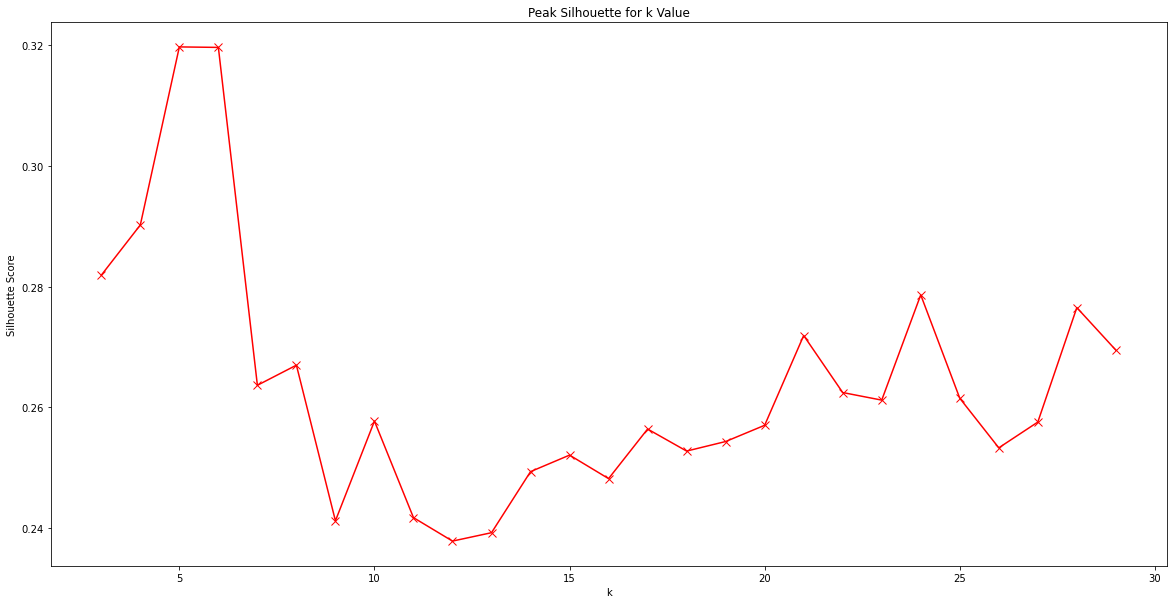

In [48]:
plt.figure(figsize=(20,10)) 
plt.plot(k_values, km_silhouette, 'rx-', markersize=8)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Peak Silhouette for k Value')
plt.show()

In [89]:
%%time
km_silhouette = []
k_values = range(3,4)
for k in k_values:
    kmeans = MiniBatchKMeans(init='k-means++', 
                             n_clusters=k, 
                             random_state=42, 
                             batch_size=1000,
                             verbose=1,
                            ).fit(X)
    predictions = kmeans.predict(X)
    silhouette = silhouette_score(X, predictions)
    km_silhouette.append(silhouette)

Init 1/3 with method: k-means++
Inertia for init 1/3: 18314939165.719246
Init 2/3 with method: k-means++
Inertia for init 2/3: 18521609064.126751
Init 3/3 with method: k-means++
Inertia for init 3/3: 18683940209.189621
Minibatch iteration 1/1400: mean batch inertia: 6003120.986292, ewa inertia: 6003120.986292 
Minibatch iteration 2/1400: mean batch inertia: 6012702.554648, ewa inertia: 6004540.372761 
Minibatch iteration 3/1400: mean batch inertia: 5777516.111613, ewa inertia: 5970909.640052 
Minibatch iteration 4/1400: mean batch inertia: 5843752.825745, ewa inertia: 5952072.988796 
Minibatch iteration 5/1400: mean batch inertia: 6045919.403128, ewa inertia: 5965975.131501 
Minibatch iteration 6/1400: mean batch inertia: 6100702.785448, ewa inertia: 5985933.305554 
Minibatch iteration 7/1400: mean batch inertia: 6123250.173221, ewa inertia: 6006275.038414 
Minibatch iteration 8/1400: mean batch inertia: 6055045.943506, ewa inertia: 6013499.822517 
Minibatch iteration 9/1400: mean batc